In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [23]:
data_raw_germ_DAX = pd.read_html('https://en.wikipedia.org/wiki/DAX', match='Ticker')


In [24]:
data_raw_germ_DAX = data_raw_germ_DAX[0]
data_raw_germ_DAX.head()

,Logo,Company,Prime Standard Sector,Ticker,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Apparel,ADS.DE,2.0,"061,401 (2021)",1924
1,NaN,Airbus,Aerospace & Defence,AIR.DE,6.0,126.495 (2021),1970
2,NaN,Allianz,Financial Services,ALV.DE,7.1,"155,411 (2021)",1890
3,NaN,BASF,Chemicals,BAS.DE,3.5,"111,047 (2021)",1865
4,NaN,Bayer,Pharmaceuticals,BAYN.DE,4.8,"099,637 (2021)",1863


In [25]:
data_raw_germ_DAX = data_raw_germ_DAX.sort_values('Index weighting (%)1', ascending=False).iloc[:30]

In [26]:
stocks_DAX = {}
for index, row in data_raw_germ_DAX.iterrows():
    ticker = str(row['Ticker'])
    ticker_dax_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_dax_data.shape[0] != 0:
        stocks_DAX[ticker] = ticker_dax_data

In [27]:
data_raw_GB_FTSE100 = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index', match='Ticker')

In [28]:
data_raw_GB_FTSE100 = data_raw_GB_FTSE100[0]
data_raw_GB_FTSE100['Ticker'] = data_raw_GB_FTSE100['Ticker'] + '.L'
data_raw_GB_FTSE100.head()

,Company,Ticker,FTSE industry classification benchmark sector[23]
0,3i,III.L,Financial services
1,Admiral Group,ADM.L,Insurance
2,Airtel Africa,AAF.L,Telecommunications services
3,Anglo American plc,AAL.L,Mining
4,Antofagasta plc,ANTO.L,Mining


In [29]:
stocks_FTSE100 = {}
for index, row in data_raw_GB_FTSE100.iterrows():
    ticker = str(row['Ticker'])
    ticker_ftse_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_ftse_data.shape[0] != 0:
        stocks_FTSE100[ticker] = ticker_ftse_data


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AV..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BA..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BP..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BT.A.L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JD..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NG..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RR..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SN..L']: Exception('%ticker%: No timezone found, symbol may be de

In [30]:
data_raw_Fr_CAC40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40', match='Ticker' )

In [31]:
data_raw_Fr_CAC40 = data_raw_Fr_CAC40[0]
data_raw_Fr_CAC40.head()

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [32]:
stocks_CAC40 = {}
for index, row in data_raw_Fr_CAC40.iterrows():
    ticker = str(row['Ticker'])
    ticker_cac_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_cac_data.shape[0] != 0:
        stocks_CAC40[ticker] = ticker_cac_data

Скачали данные об акциях из индексов за 2023 год

In [ ]:
#Германия

In [33]:
DAX_returns_dict=dict()

for ticker in stocks_DAX.keys():
    DAX_returns_dict[ticker] = np.log(stocks_DAX[ticker]['Close'] / stocks_DAX[ticker]['Close'].shift(1))
dax_DF_returns = pd.DataFrame(DAX_returns_dict).dropna()

In [ ]:
#Франция

In [34]:
CAC_returns_dict=dict()

for ticker in stocks_CAC40.keys():
    CAC_returns_dict[ticker] = np.log(stocks_CAC40[ticker]['Close'] / stocks_CAC40[ticker]['Close'].shift(1))
CAC_DF_returns = pd.DataFrame(CAC_returns_dict).dropna()

In [ ]:
#Англия

In [35]:
FTSE_returns_dict=dict()

for ticker in stocks_FTSE100.keys():
    FTSE_returns_dict[ticker] = np.log(stocks_FTSE100[ticker]['Close'] / stocks_FTSE100[ticker]['Close'].shift(1))
FTSE_DF_returns = pd.DataFrame(FTSE_returns_dict).dropna()

In [38]:
from src.numerical_characteristics import sign_similarity

In [39]:
dax_DF = sign_similarity(dax_DF_returns)

In [40]:
dax_DF

array([[1.   , 0.676, 0.644, 0.636, 0.652, 0.612, 0.616, 0.668, 0.568,
        0.636, 0.668, 0.616, 0.632, 0.564, 0.556, 0.664, 0.512, 0.556,
        0.588, 0.612, 0.608, 0.616, 0.576, 0.636, 0.636, 0.592, 0.652,
        0.584, 0.588, 0.564],
       [0.676, 1.   , 0.632, 0.608, 0.664, 0.64 , 0.668, 0.704, 0.548,
        0.688, 0.728, 0.556, 0.684, 0.616, 0.576, 0.676, 0.54 , 0.56 ,
        0.64 , 0.608, 0.66 , 0.564, 0.612, 0.608, 0.664, 0.556, 0.672,
        0.548, 0.544, 0.512],
       [0.644, 0.632, 1.   , 0.624, 0.672, 0.624, 0.628, 0.568, 0.684,
        0.664, 0.664, 0.676, 0.652, 0.632, 0.552, 0.62 , 0.62 , 0.56 ,
        0.664, 0.632, 0.644, 0.596, 0.556, 0.624, 0.64 , 0.612, 0.672,
        0.612, 0.656, 0.6  ],
       [0.636, 0.608, 0.624, 1.   , 0.592, 0.608, 0.596, 0.584, 0.628,
        0.568, 0.6  , 0.62 , 0.628, 0.592, 0.624, 0.572, 0.628, 0.576,
        0.544, 0.552, 0.604, 0.644, 0.612, 0.608, 0.584, 0.628, 0.632,
        0.612, 0.584, 0.584],
       [0.652, 0.664, 0.672,

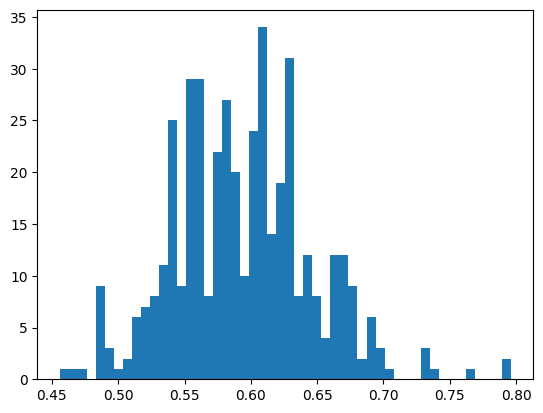

In [41]:
lst_DAX_corr = []

for i in range(len(dax_DF)):
    for j in range(i+1, len(dax_DF)):
        lst_DAX_corr.append(dax_DF[i][j])
plt.hist(lst_DAX_corr, bins=50)
plt.show()

In [42]:
FTSE_DF = sign_similarity(FTSE_DF_returns)

In [43]:
FTSE_DF

array([[1.        , 0.66527197, 0.62343096, ..., 0.65271967, 0.64435146,
        0.63598326],
       [0.66527197, 1.        , 0.59832636, ..., 0.61924686, 0.56066946,
        0.59414226],
       [0.62343096, 0.59832636, 1.        , ..., 0.59414226, 0.66945607,
        0.58577406],
       ...,
       [0.65271967, 0.61924686, 0.59414226, ..., 1.        , 0.64853556,
        0.69037657],
       [0.64435146, 0.56066946, 0.66945607, ..., 0.64853556, 1.        ,
        0.69874477],
       [0.63598326, 0.59414226, 0.58577406, ..., 0.69037657, 0.69874477,
        1.        ]])

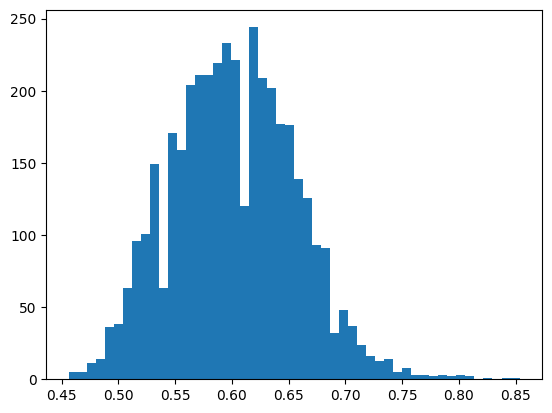

In [44]:
lst_FTSE_corr = []

for i in range(len(FTSE_DF)):
    for j in range(i+1, len(FTSE_DF)):
        lst_FTSE_corr.append(FTSE_DF[i][j])
plt.hist(lst_FTSE_corr, bins=50)
plt.show()

In [45]:
CAC_DF =  sign_similarity(CAC_DF_returns)

In [46]:
CAC_DF

array([[1.        , 0.64285714, 0.61538462, ..., 0.61538462, 0.68681319,
        0.56593407],
       [0.64285714, 1.        , 0.63186813, ..., 0.60989011, 0.67032967,
        0.6043956 ],
       [0.61538462, 0.63186813, 1.        , ..., 0.6043956 , 0.65384615,
        0.6978022 ],
       ...,
       [0.61538462, 0.60989011, 0.6043956 , ..., 1.        , 0.70879121,
        0.63186813],
       [0.68681319, 0.67032967, 0.65384615, ..., 0.70879121, 1.        ,
        0.67032967],
       [0.56593407, 0.6043956 , 0.6978022 , ..., 0.63186813, 0.67032967,
        1.        ]])

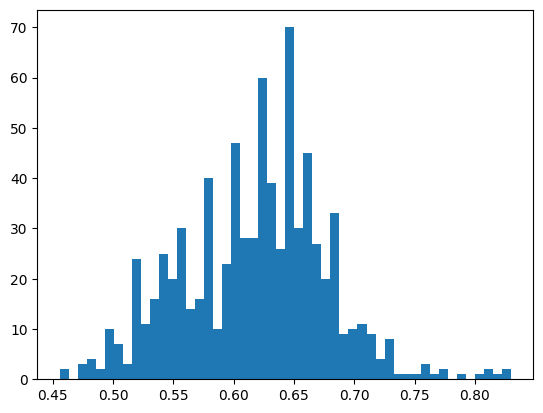

In [47]:
lst_CAC_corr = []

for i in range(len(CAC_DF)):
    for j in range(i+1, len(CAC_DF)):
        lst_CAC_corr.append(CAC_DF[i][j])
plt.hist(lst_CAC_corr, bins=50)
plt.show()

In [48]:
from scipy.stats import norm

In [49]:
from src.test_statistics import sign_similarity_statistics

In [50]:
import numpy as np

def compute_bounds(correlation_matrix, alpha, gamma_0):
    upper_bounds = []
    lower_bounds = []
    ce = norm.ppf(0.05)
    cn = norm.ppf(1-(0.05))

      # Вычисление верхних и нижних границ для каждой пары (i, j)
    for i in range(N):
        for j in range(N):
            if i < j:


                  # Проверка гипотезы для верхней границы
                if correlation_matrix[i,j] >= ce:

                    upper_bounds.append(correlation_matrix[i, j])

                  # Проверка гипотезы для нижней границы
                if correlation_matrix[i,j] > cn:
                    lower_bounds.append(correlation_matrix[i, j])

    return upper_bounds, lower_bounds




In [51]:
N = CAC_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(CAC_DF_returns.corr())


In [52]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_fr = []
K1f=[]
K2f=[]
K1=0
K2=0
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = sign_similarity_statistics(CAC_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_fr.append(len(upper_bounds)-len(lower_bounds))
  K1f.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2f.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


/content/src/test_statistics.py:88: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))
/content/src/test_statistics.py:88: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))


In [53]:
print(K1,K2)

0.10751748251748251 0.2421875046843569


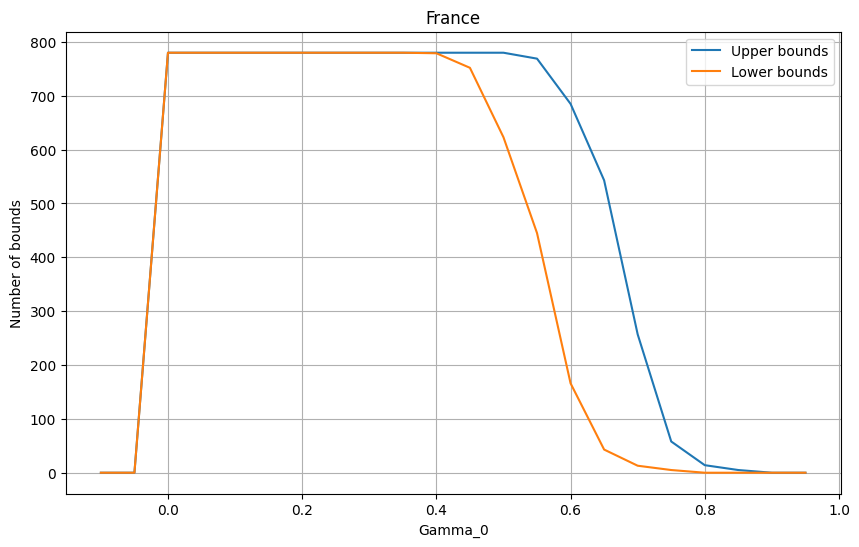

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France')
plt.legend()
plt.grid(True)
plt.show()

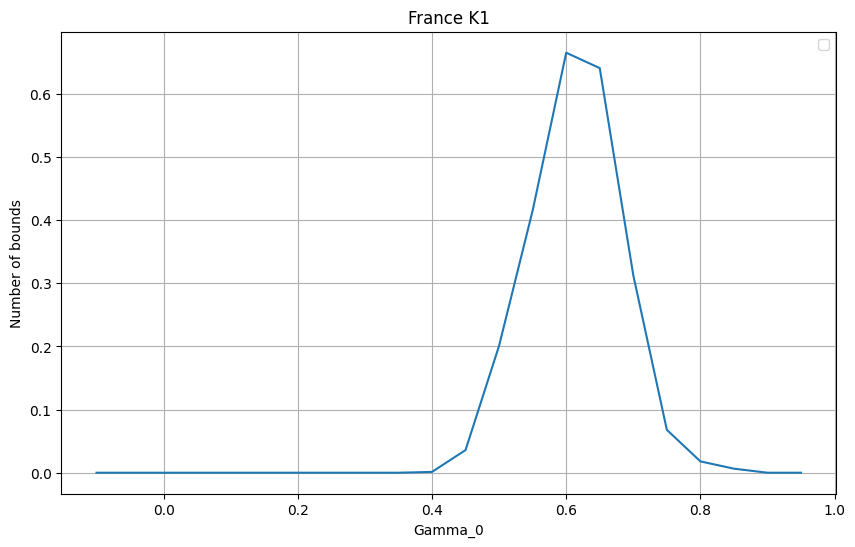

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()

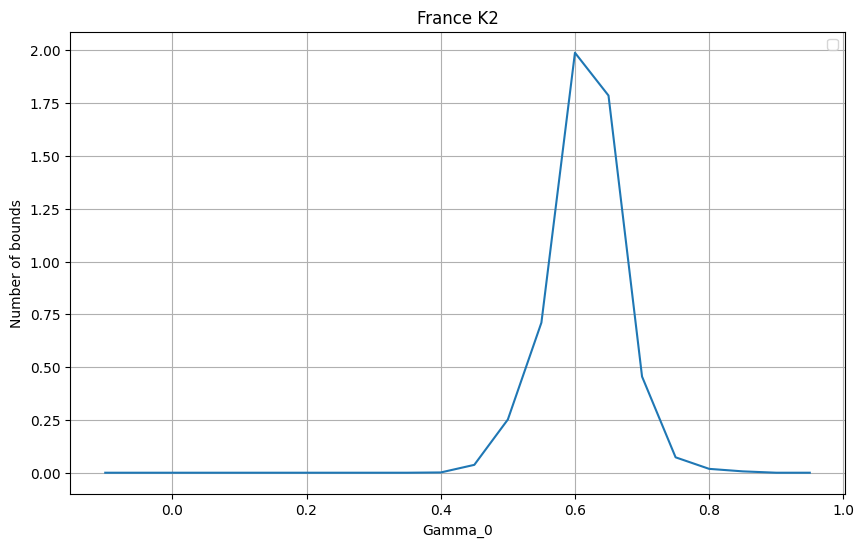

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K2')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
N = FTSE_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(FTSE_DF_returns.corr())

In [55]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_eng = []
K1e = []
K2e = []
K1=0
K2=0
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = sign_similarity_statistics(FTSE_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_eng.append(len(upper_bounds)-len(lower_bounds))
  K1e.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2e.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


/content/src/test_statistics.py:88: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))
/content/src/test_statistics.py:88: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))


In [56]:
print(K1,K2)

0.09417773237997956 0.19498927060046806


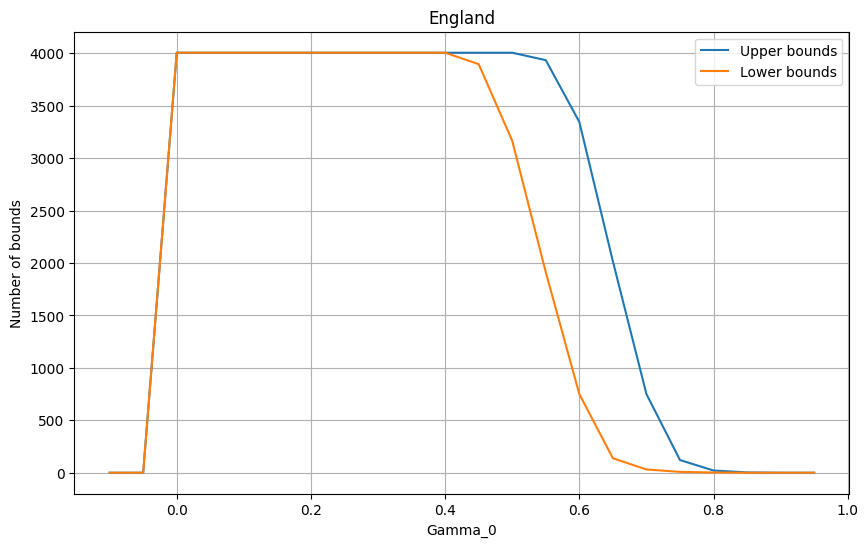

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England')
plt.legend()
plt.grid(True)
plt.show()

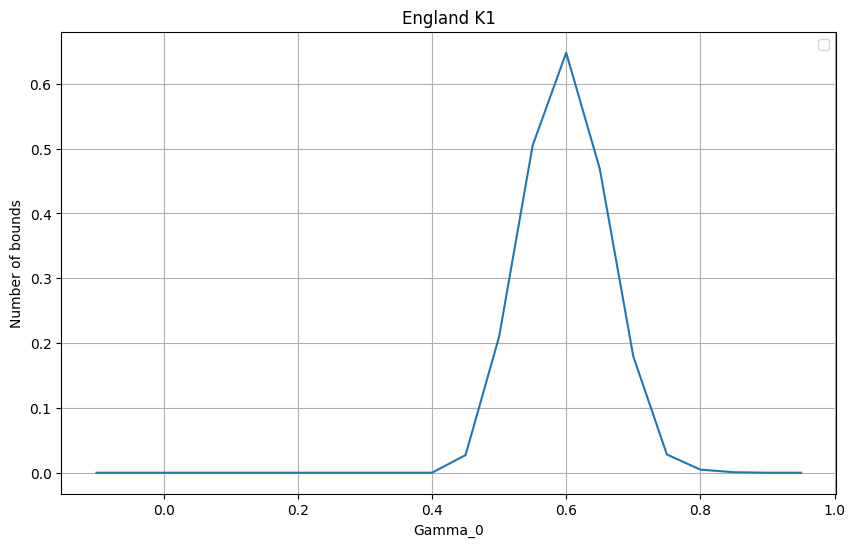

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England K1')
plt.legend()
plt.grid(True)
plt.show()

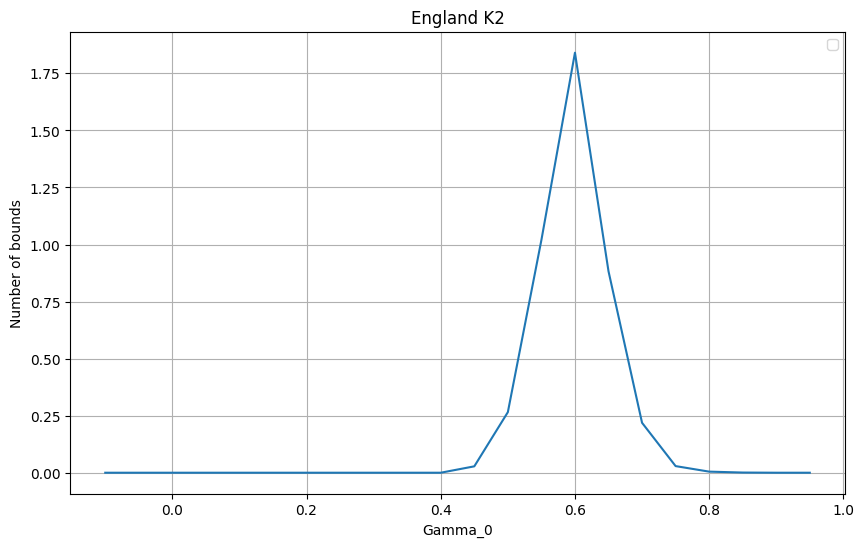

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England K2')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
N = dax_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(dax_DF_returns.corr())

In [58]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_germ = []
K1g=[]
K2g=[]
K1=0
K2=0
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = sign_similarity_statistics(dax_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_germ.append(len(upper_bounds)-len(lower_bounds))
  K1g.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2g.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


/content/src/test_statistics.py:88: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))
/content/src/test_statistics.py:88: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(n) * (sign_similarity(x) - threshold) / np.sqrt(threshold * (1 - threshold))


In [59]:
print(K1,K2)

0.09090909090909091 0.19396403925428088


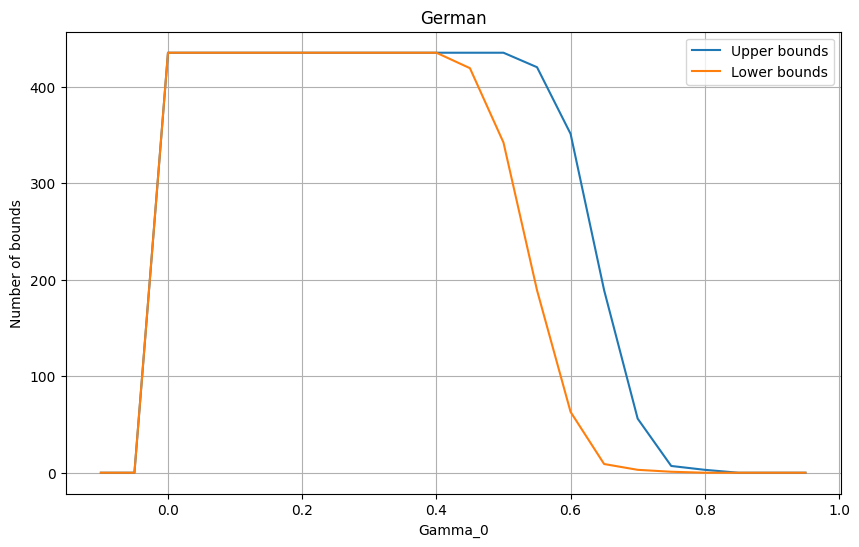

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German')
plt.legend()
plt.grid(True)
plt.show()

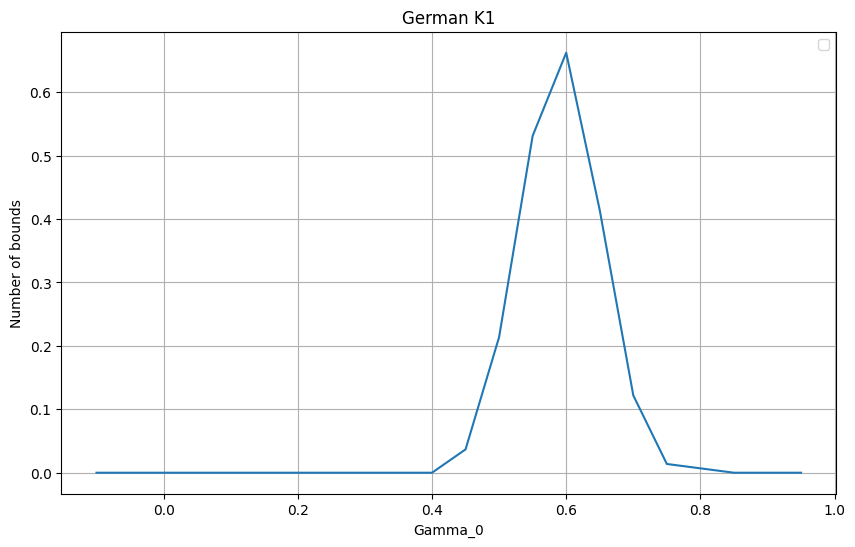

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German K1')
plt.legend()
plt.grid(True)
plt.show()

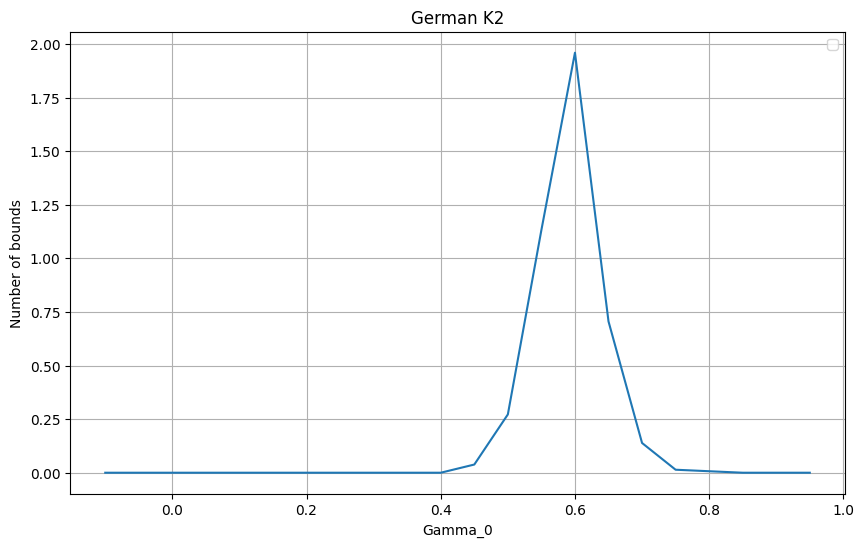

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German K2')
plt.legend()
plt.grid(True)
plt.show()

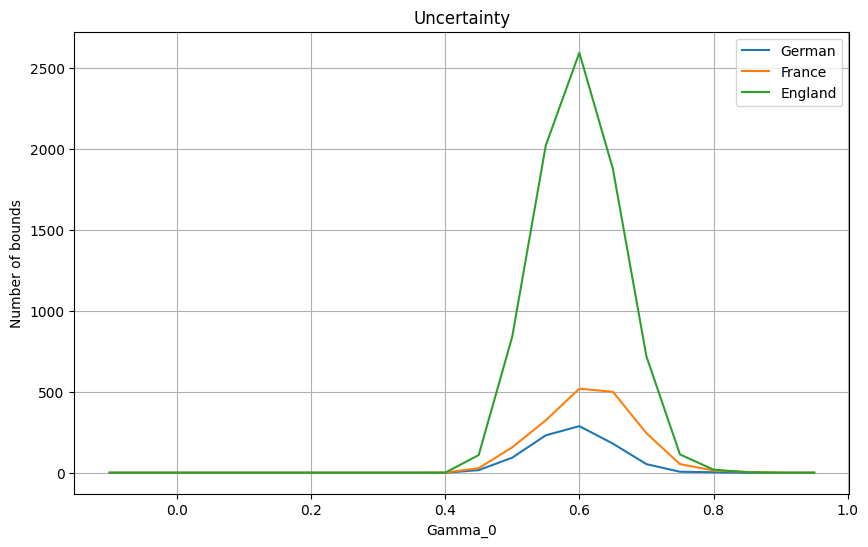

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, uncertainty_germ, label='German')
plt.plot(gamma_0_values, uncertainty_fr, label='France')
plt.plot(gamma_0_values, uncertainty_eng, label='England')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('Uncertainty')
plt.legend()
plt.grid(True)
plt.show()

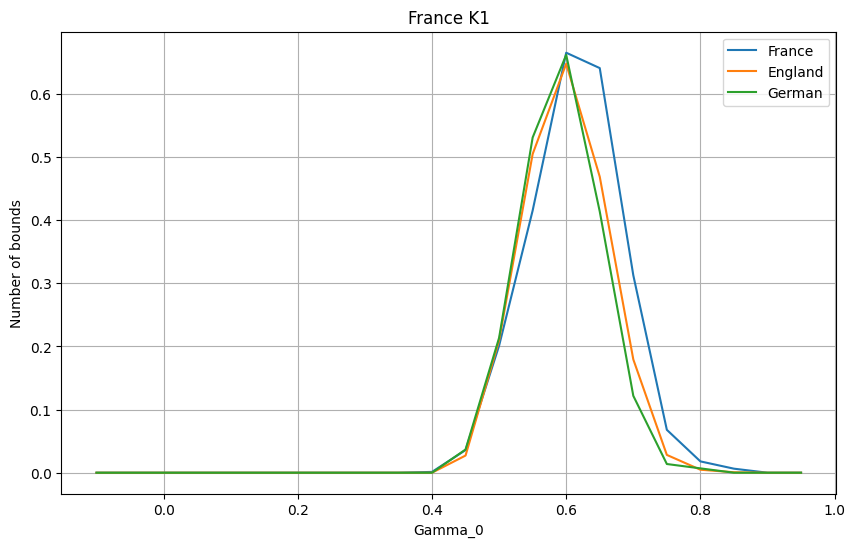

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K1f, label='France')
plt.plot(gamma_0_values,K1e, label='England')
plt.plot(gamma_0_values,K1g, label='German')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()

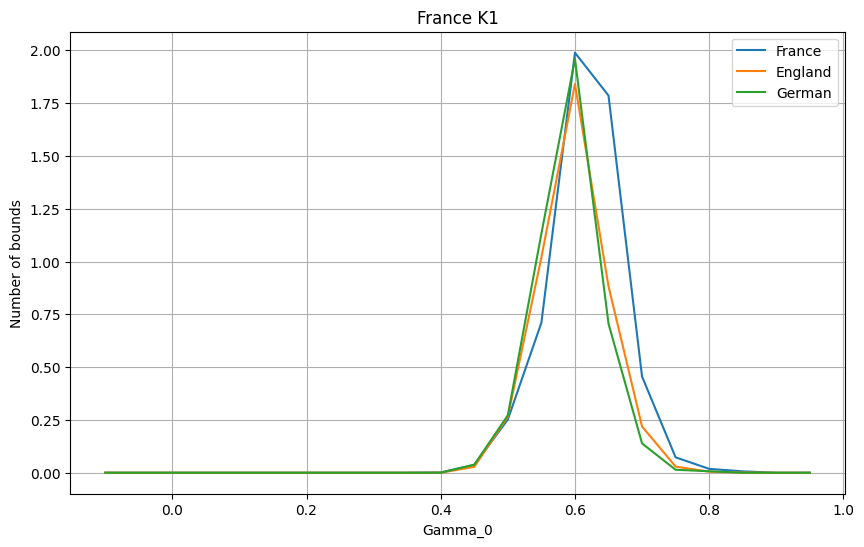

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K2f, label='France')
plt.plot(gamma_0_values,K2e, label='England')
plt.plot(gamma_0_values,K2g, label='German')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()